In [0]:
import numpy as np
import h5py
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import keras
from keras.layers import *
from keras.regularizers import *
from keras.optimizers import *

%matplotlib inline

In [0]:
os.chdir('drive/My Drive/Dataset')

In [0]:
def Load_Data():
  
  train_dataset = h5py.File('train_signs.h5','r')
  test_dataset = h5py.File('test_signs.h5','r')
  
  train_set_X_orig = np.array(train_dataset['train_set_x'][:])
  train_set_Y_orig = np.array(train_dataset['train_set_y'][:])
  test_set_X_orig = np.array(test_dataset['test_set_x'][:])
  test_set_Y_orig = np.array(test_dataset['test_set_y'][:])
  
  classes = np.array(test_dataset['list_classes'][:])
  
  return train_set_X_orig,train_set_Y_orig,test_set_X_orig,test_set_Y_orig,classes

(1080, 64, 64, 3) (1080,) (120, 64, 64, 3) (120,)
y = 5. It is the number 5


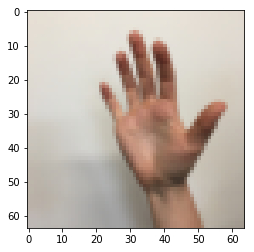

In [45]:
train_set_X_orig,train_set_Y_orig,test_set_X_orig,test_set_Y_orig,classes = Load_Data()

print(train_set_X_orig.shape,train_set_Y_orig.shape,test_set_X_orig.shape,test_set_Y_orig.shape)
i = 10
plt.imshow(test_set_X_orig[i])
print('y = '+str(test_set_Y_orig[i])+'. It is the number '+str(test_set_Y_orig[i]))

In [0]:
def Reshape_And_Normalize(train_set_X_orig,train_set_Y_orig,test_set_X_orig,test_set_Y_orig):
  
  m_train = train_set_X_orig.shape[0]
  m_test = test_set_X_orig.shape[0]
  train_set_X = train_set_X_orig.reshape(m_train,-1)
  test_set_X = test_set_X_orig.reshape(m_test,-1)

  train_set_Y = train_set_Y_orig.reshape((m_train,1))
  test_set_Y = test_set_Y_orig.reshape((m_test,1))
  
  U_train = np.sum(train_set_X,axis=1,keepdims=True)/m_train
  U_test = np.sum(test_set_X,axis=1,keepdims=True)/m_test
  
  train_set_X = train_set_X - U_train
  test_set_X = test_set_X - U_test
  
  sigma_train = np.sqrt(np.sum(np.square(train_set_X),axis=1,keepdims=True)/m_train)
  sigma_test = np.sqrt(np.sum(np.square(test_set_X),axis=1,keepdims=True)/m_test)
  
  train_set_X /= sigma_train
  test_set_X /= sigma_test
  
  return train_set_X,train_set_Y,test_set_X,test_set_Y

In [0]:
def Data_Preprocessing():
  
  train_set_X_orig,train_set_Y_orig,test_set_X_orig,test_set_Y_orig,classes = Load_Data()
  train_set_X,train_set_Y,test_set_X,test_set_Y = Reshape_And_Normalize(train_set_X_orig,train_set_Y_orig,test_set_X_orig,test_set_Y_orig)
  
  return train_set_X,train_set_Y,test_set_X,test_set_Y

In [0]:
def Propagation(layers_dims,regu,lambd,keep_prob):
  
  model = keras.models.Sequential()
  L = len(layers_dims)
  if(regu):
    lambd = lambd
  else:
    lambd = 0.0
  
  for l in range(1,L):
    
    if(l < L-1):
      activation = 'relu'
    else:
      if(layers_dims[l] == 1):
        activation = 'sigmoid'
      else:
        activation = 'softmax'
     
    model.add(BatchNormalization(axis=1,name='BatchNorm_F'+str(l+1)))
    model.add(Dense(layers_dims[l],activation=activation,kernel_initializer='glorot_uniform', bias_initializer='zeros',name='FullyConnected'+str(l+1),use_bias=True,kernel_regularizer=l2(0.01)))
    model.add(Dropout(rate=keep_prob[l-1]))
  
  return model

In [0]:
def Caller_Function():
  
  train_set_X,train_set_Y,test_set_X,test_set_Y = Data_Preprocessing()
  epochs = 10
  regu = False
  lambd = 0.01
  mini_batch_size = 10
  layers_dims = [train_set_X.shape[1]]
  layers_dims.extend([1024,6])
  keep_prob = [1,1]
  train_set_Y = np.eye(layers_dims[len(layers_dims)-1])[train_set_Y.T][0]
  test_set_Y = np.eye(layers_dims[len(layers_dims)-1])[test_set_Y.T][0]
  
  model = Propagation(layers_dims,regu,lambd,keep_prob)
  opt = Adam(lr=0.05)
  model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])
  model.fit(x=train_set_X[0:50,:],y=train_set_Y[0:50,:],epochs=epochs,batch_size=mini_batch_size)
  print('')
  preds = model.evaluate(x=train_set_X[0:10,:],y=train_set_Y[0:10,:])
  print("Train_Accuracy : "+str(preds[1]*100))
  print('')
  preds = model.evaluate(x=test_set_X[0:10,:],y=test_set_Y[0:10,:])
  print("Test_Accuracy : "+str(preds[1]*100))
  
  model.summary()
  print(model.predict(x=test_set_X[10:11,:]))

In [52]:
Caller_Function()

Epoch 1/10
50/50 [==============================] - 4s 89ms/step - loss: 441.8448 - acc: 0.1800
Epoch 2/10
50/50 [==============================] - 2s 35ms/step - loss: 793.6725 - acc: 0.3800
Epoch 3/10
50/50 [==============================] - 2s 35ms/step - loss: 533.6242 - acc: 0.4200
Epoch 4/10
50/50 [==============================] - 2s 35ms/step - loss: 318.1472 - acc: 0.3200
Epoch 5/10
50/50 [==============================] - 2s 34ms/step - loss: 199.2126 - acc: 0.4200
Epoch 6/10
50/50 [==============================] - 2s 35ms/step - loss: 159.6276 - acc: 0.1200
Epoch 7/10
50/50 [==============================] - 2s 35ms/step - loss: 165.2983 - acc: 0.2800
Epoch 8/10
50/50 [==============================] - 2s 36ms/step - loss: 142.3491 - acc: 0.2000
Epoch 9/10
50/50 [==============================] - 2s 36ms/step - loss: 145.9833 - acc: 0.2000
Epoch 10/10
50/50 [==============================] - 2s 36ms/step - loss: 141.8437 - acc: 0.1800

10/10 [==============================]